In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np
import statistics as sts
import math

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np
import statistics as sts
import math

#read the data
total_cases = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/total_cases.csv')
total_deaths = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/total_deaths.csv')
daily_cases = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/new_cases.csv')
daily_deaths = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/new_deaths.csv')
full_set = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv')

full_set = full_set.fillna(0)
full_set['date'] = pd.to_datetime(full_set['date'])

#make list of all locations in the data
all_locations = list(set(full_set['location']))
full_set['est_total_cases'] = full_set['total_deaths'] * 100

country_list = list(set(full_set['location']))
full_set.sort_values('date').head()



,date,location,new_cases,new_deaths,total_cases,total_deaths,est_total_cases
0,2019-12-31,Afghanistan,0,0,0,0,0
4029,2019-12-31,Lithuania,0,0,0,0,0
5206,2019-12-31,Pakistan,0,0,0,0,0
1910,2019-12-31,Ecuador,0,0,0,0,0
2936,2019-12-31,India,0,0,0,0,0


In [91]:
#For a treshold
country_list_s = list(set(full_set.loc[full_set['total_deaths'] >= 20]['location'])) #more then 20 deaths reported
country_list_s.remove('World')

In [93]:
#lets make it more interactive with plotly
import plotly.graph_objects as go
traces_list = []
for item in country_list_s:
    dates = list(full_set.loc[full_set['location'] == item]['date'])
    x = [(day - dates[0]).days for day in dates]
    
    y = full_set.loc[full_set['location'] == item]['total_deaths']

    trace = go.Scatter(x=x,
            y=y,
            name = item,
            )
    traces_list.append(trace)

Layout = go.Layout(xaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                   yaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                   xaxis_title="days since outbreak in country",
                   yaxis_title="Total Deaths",
                    )

fig = go.Figure(data=traces_list, layout=Layout)
fig

In [133]:
country = 'Italy'
dates = list(full_set.loc[full_set['location'] == country]['date'])
x = [(day - dates[0]).days for day in dates]

total_deaths = full_set.loc[full_set['location'] == country]['total_deaths']
log_deaths = []
log2_deaths = []
for item in total_deaths:
    if item ==0:
        log_deaths.append(0)
        log2_deaths.append(0)
    else:
        log_deaths.append(math.log(item))
        log2_deaths.append(math.log2(item))
        
trace1 = go.Scatter(x=x,
        y=log_deaths,
        name = 'log',
        )

trace2 = go.Scatter(x=x,
        y=log2_deaths,
        name = 'log2',
        )

Layout = go.Layout(xaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                   yaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                   xaxis_title="days since outbreak in country",
                   yaxis_title=" log Total Deaths",
                    )

fig = go.Figure(data=[trace1, trace2], layout=Layout)
fig

In [129]:
trace = go.Scatter(x=x,
        y=log2_deaths,
        name = item,
        )

Layout = go.Layout(xaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                   yaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                   xaxis_title="days since outbreak in country",
                   yaxis_title=" log Total Deaths",
                    )

fig = go.Figure(data=trace, layout=Layout)
fig

In [115]:
log_deaths

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0.0,
 1.0986122886681098,
 1.0986122886681098,
 1.3862943611198906,
 1.6094379124341003,
 1.6094379124341003,
 1.6094379124341003,
 2.4849066497880004,
 2.995732273553991,
 3.1780538303479458,
 3.7612001156935624,
 4.060443010546419,
 4.330733340286331,
 4.663439094112067,
 4.912654885736052,
 5.187385805840755,
 5.3612921657094255,
 5.62040086571715,
 5.87493073085203,
 6.073044534100405,
 6.302618975744905]

In [36]:
#calculate avg_amount of deaths per day
all_data = []
for location in country_list_s:
    total_death = list(full_set.loc[full_set['location'] == location]['total_deaths'])[-1]
    avg_death = total_death /len(full_set.loc[full_set['location'] == location])
    
    all_data.append((location, avg_death, total_death))
df = pd.DataFrame(all_data)
df = df.sort_values(1)
df.head()

,0,1,2
19,San Marino,0.238636,21
17,Algeria,0.250000,21
15,Dominican Republic,0.250000,20
20,Ireland,0.252874,22
25,Romania,0.275862,24


C:\Users\_Vinc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


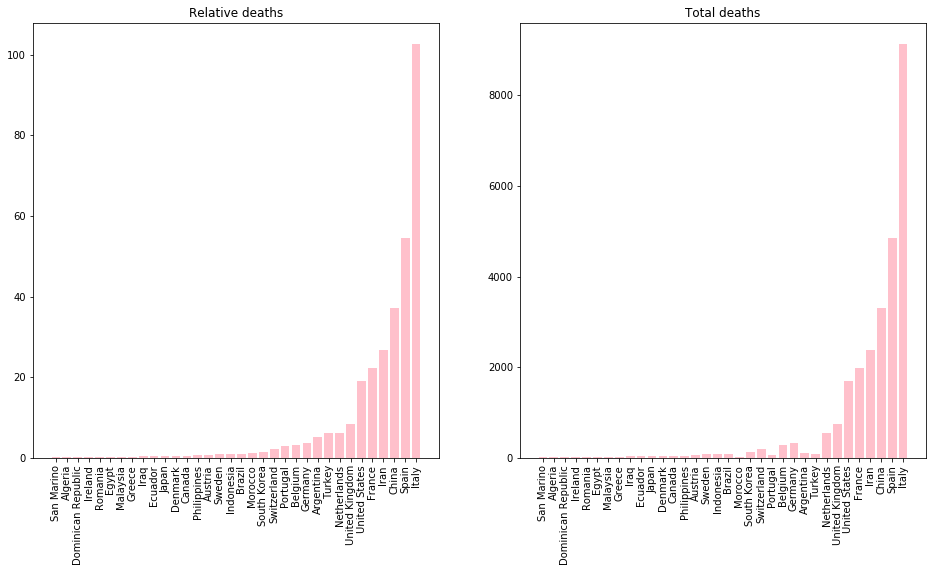

In [57]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.bar(df[0], df[1], width=0.8, color='pink')
ax1.set_title('Relative deaths')
ax2.bar(df[0], df[2], width=0.8, color='pink')
ax2.set_title('Total deaths')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
f.show()